In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

In [2]:
# Load Iris dataset with sklearn
iris = datasets.load_iris()

# We use the petal length and width 
X = iris.data[:,[2,3]]
y = iris.target

iris_dataframe = pd.DataFrame(X, columns=iris.feature_names[2:])
print(iris_dataframe.head())

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2


In [3]:
# Training and Test Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

print("Training Sample: {}".format(X_train.shape[0]))
print("Test Sample: {}".format(X_test.shape[0]))

Training Sample: 105
Test Sample: 45


In [4]:
#Now, we will scale the data with using sklearn.
sc = StandardScaler()
sc.fit(X_train)

X_train_ = sc.transform(X_train)
X_test_ = sc.transform(X_test)

#After standardizing our features
print(pd.DataFrame(X_train_, columns=iris_dataframe.columns).head())

   petal length (cm)  petal width (cm)
0          -0.182950         -0.291459
1           0.930661          0.737219
2           1.042022          1.637313
3           0.652258          0.351465
4           1.097702          0.737219


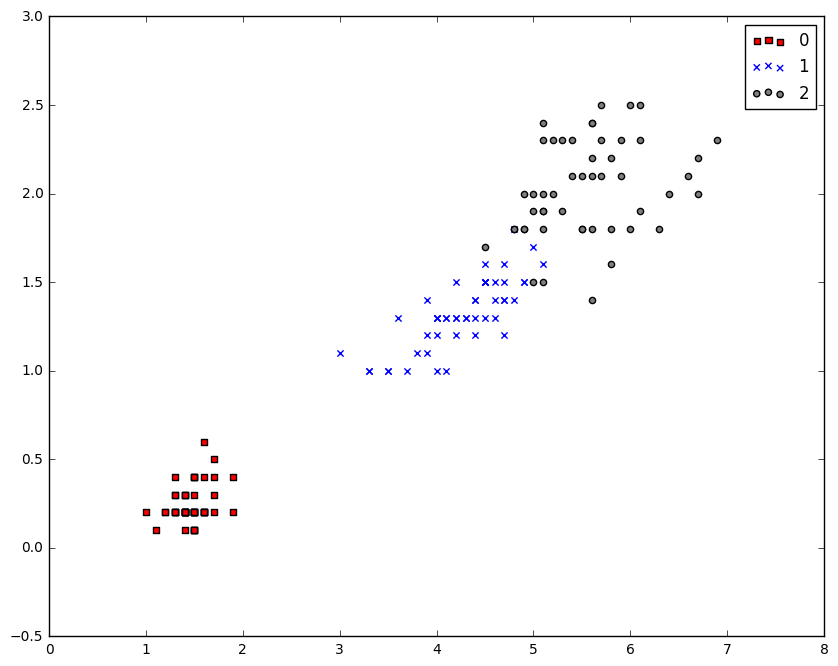

In [5]:
# Now plotting with matplotlib
markers = ("s","x","o")
colors = ("red","blue","gray")
cmap = ListedColormap(colors[:len(np.unique(y_test))])
plt.figure(figsize=(10,8))
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y ==cl, 0],y=X[y==cl,1],c=cmap(idx),marker=markers[idx],label=cl)
    plt.legend()
plt.show()

In [6]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    plt.figure(figsize=(10,8))
    # setup marker generator and color map
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'gray')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        plt.legend()

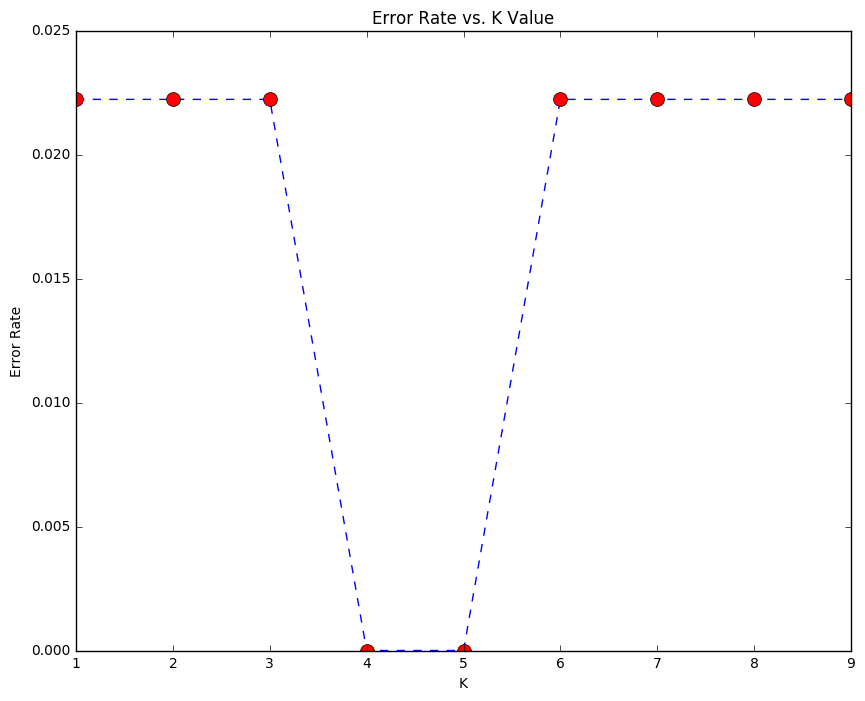

In [7]:
# Error Rate versus K Value
error_rate = []

for i in range(1,10):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_, y_train)
    pred_i = knn.predict(X_test_)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,8))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
plt.close()

In [8]:
# KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_, y_train)

print ("Train - Accuracy :", metrics.accuracy_score(y_train, knn.predict(X_train_)))
print ("Train - Confusion matrix :",metrics.confusion_matrix(y_train, knn.predict(X_train_)))
print ("Train - classification report :", metrics.classification_report(y_train, knn.predict(X_train_)))
print("\n")
print ("Test - Accuracy :", metrics.accuracy_score(y_test, knn.predict(X_test_)))
print ("Test - Confusion matrix :",metrics.confusion_matrix(y_test, knn.predict(X_test_)))
print ("Test - classification report :", metrics.classification_report(y_test, knn.predict(X_test_)))

Train - Accuracy : 0.952380952381
Train - Confusion matrix : [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Train - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.91      0.94      0.92        32
          2       0.95      0.92      0.94        39

avg / total       0.95      0.95      0.95       105



Test - Accuracy : 1.0
Test - Confusion matrix : [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Test - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      1.00      1.00        18
          2       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        45



In [9]:
plot_decision_regions(X_test_, y_test, knn)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


In [10]:
# Logistic Regression
LReg = LogisticRegression()
LReg.fit(X_train_, y_train)

# generate evaluation metrics
print ("Train - Accuracy :", metrics.accuracy_score(y_train, LReg.predict(X_train_)))
print ("Train - Confusion matrix :",metrics.confusion_matrix(y_train, LReg.predict(X_train_)))
print ("Train - classification report :", metrics.classification_report(y_train, LReg.predict(X_train_)))
print("\n")
print ("Test - Accuracy :", metrics.accuracy_score(y_test, LReg.predict(X_test_)))
print ("Test - Confusion matrix :",metrics.confusion_matrix(y_test, LReg.predict(X_test_)))
print ("Test - classification report :", metrics.classification_report(y_test, LReg.predict(X_test_)))

Train - Accuracy : 0.914285714286
Train - Confusion matrix : [[34  0  0]
 [ 2 23  7]
 [ 0  0 39]]
Train - classification report :              precision    recall  f1-score   support

          0       0.94      1.00      0.97        34
          1       1.00      0.72      0.84        32
          2       0.85      1.00      0.92        39

avg / total       0.93      0.91      0.91       105



Test - Accuracy : 0.8
Test - Confusion matrix : [[16  0  0]
 [ 1  9  8]
 [ 0  0 11]]
Test - classification report :              precision    recall  f1-score   support

          0       0.94      1.00      0.97        16
          1       1.00      0.50      0.67        18
          2       0.58      1.00      0.73        11

avg / total       0.88      0.80      0.79        45



In [11]:
plot_decision_regions(X_test_, y_test, LReg)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


In [12]:
# Naive Bayes
NB = GaussianNB()
NB.fit(X_train_, y_train)

print ("Train - Accuracy :", metrics.accuracy_score(y_train, NB.predict(X_train_)))
print ("Train - Confusion matrix :",metrics.confusion_matrix(y_train, NB.predict(X_train_)))
print ("Train - classification report :", metrics.classification_report(y_train, NB.predict(X_train_)))
print("\n")
print ("Test - Accuracy :", metrics.accuracy_score(y_test, NB.predict(X_test_)))
print ("Test - Confusion matrix :",metrics.confusion_matrix(y_test, NB.predict(X_test_)))
print ("Test - classification report :", metrics.classification_report(y_test, NB.predict(X_test_)))

Train - Accuracy : 0.952380952381
Train - Confusion matrix : [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Train - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.91      0.94      0.92        32
          2       0.95      0.92      0.94        39

avg / total       0.95      0.95      0.95       105



Test - Accuracy : 0.977777777778
Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



In [13]:
plot_decision_regions(X_test_, y_test, NB)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


In [14]:
# Linear SVM
svm = SVC(kernel="linear", random_state=0,gamma=0.1,C=1.0)
svm.fit(X_train_, y_train)

print ("Train - Accuracy :", metrics.accuracy_score(y_train, svm.predict(X_train_)))
print ("Train - Confusion matrix :",metrics.confusion_matrix(y_train, svm.predict(X_train_)))
print ("Train - classification report :", metrics.classification_report(y_train, svm.predict(X_train_)))
print("\n")
print ("Test - Accuracy :", metrics.accuracy_score(y_test, svm.predict(X_test_)))
print ("Test - Confusion matrix :",metrics.confusion_matrix(y_test, svm.predict(X_test_)))
print ("Test - classification report :", metrics.classification_report(y_test, svm.predict(X_test_)))

Train - Accuracy : 0.952380952381
Train - Confusion matrix : [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Train - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.91      0.94      0.92        32
          2       0.95      0.92      0.94        39

avg / total       0.95      0.95      0.95       105



Test - Accuracy : 0.977777777778
Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



In [15]:
plot_decision_regions(X_test_,y_test,svm)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


In [16]:
# XGBoost classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train_, y_train)

print ("Train - Accuracy :", metrics.accuracy_score(y_train, xgb_clf.predict(X_train_)))
print ("Train - Confusion matrix :",metrics.confusion_matrix(y_train, xgb_clf.predict(X_train_)))
print ("Train - classification report :", metrics.classification_report(y_train, xgb_clf.predict(X_train_)))
print("\n")
print ("Test - Accuracy :", metrics.accuracy_score(y_test, xgb_clf.predict(X_test_)))
print ("Test - Confusion matrix :",metrics.confusion_matrix(y_test, xgb_clf.predict(X_test_)))
print ("Test - classification report :", metrics.classification_report(y_test, xgb_clf.predict(X_test_)))

Train - Accuracy : 0.980952380952
Train - Confusion matrix : [[34  0  0]
 [ 0 30  2]
 [ 0  0 39]]
Train - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       1.00      0.94      0.97        32
          2       0.95      1.00      0.97        39

avg / total       0.98      0.98      0.98       105



Test - Accuracy : 0.977777777778
Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



In [17]:
plot_decision_regions(X_test_, y_test, xgb_clf)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


:) 